# Predicting the likelihood of e-signing a loan based on financial history
### Aamir Hussain

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('P39-Financial-Data.csv')

# EDA

In [9]:
pd.set_option('display.max_columns', 30)
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [7]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


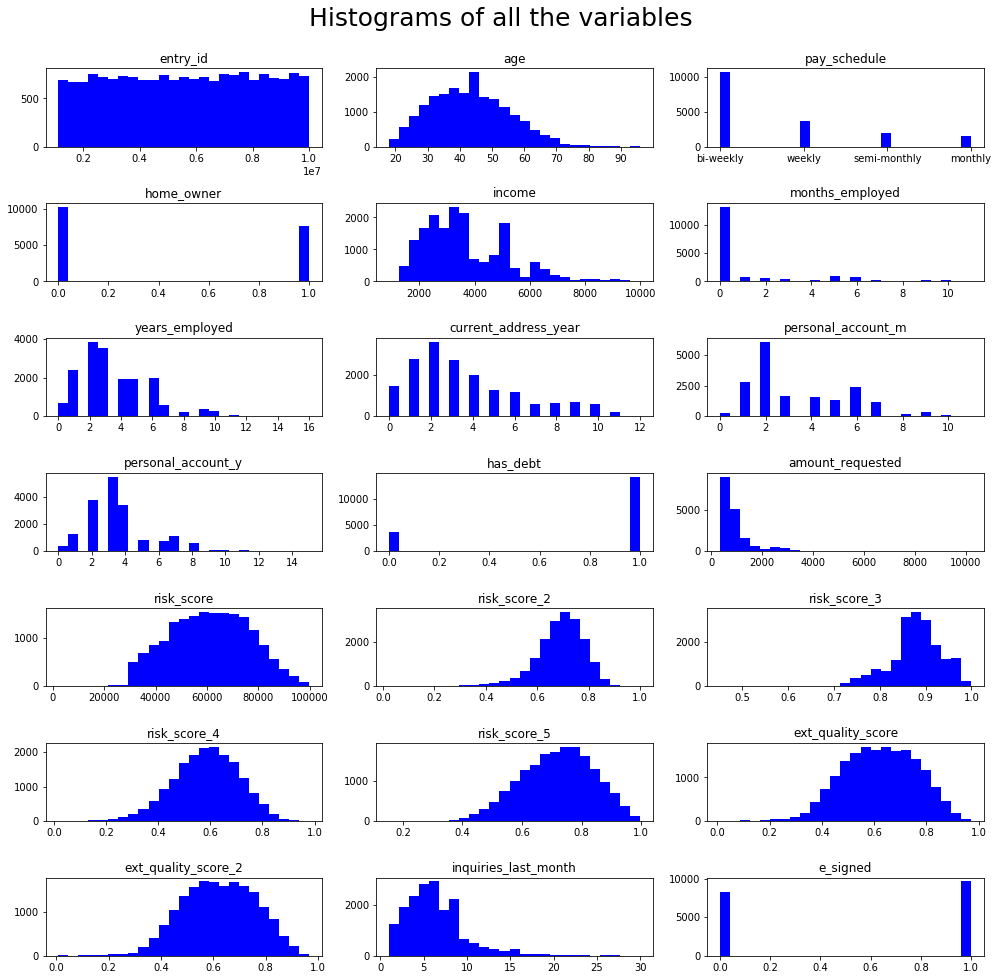

In [27]:
plt.figure(figsize=(14, 16))
plt.suptitle('Histograms of all the variables', fontsize=25)
for i in range(1, df.shape[1] + 1):
    plt.subplot(8, 3, i)
    plt.title(df.columns[i -1])
    plt.hist(df.iloc[:, i -1], color='blue', bins=25)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

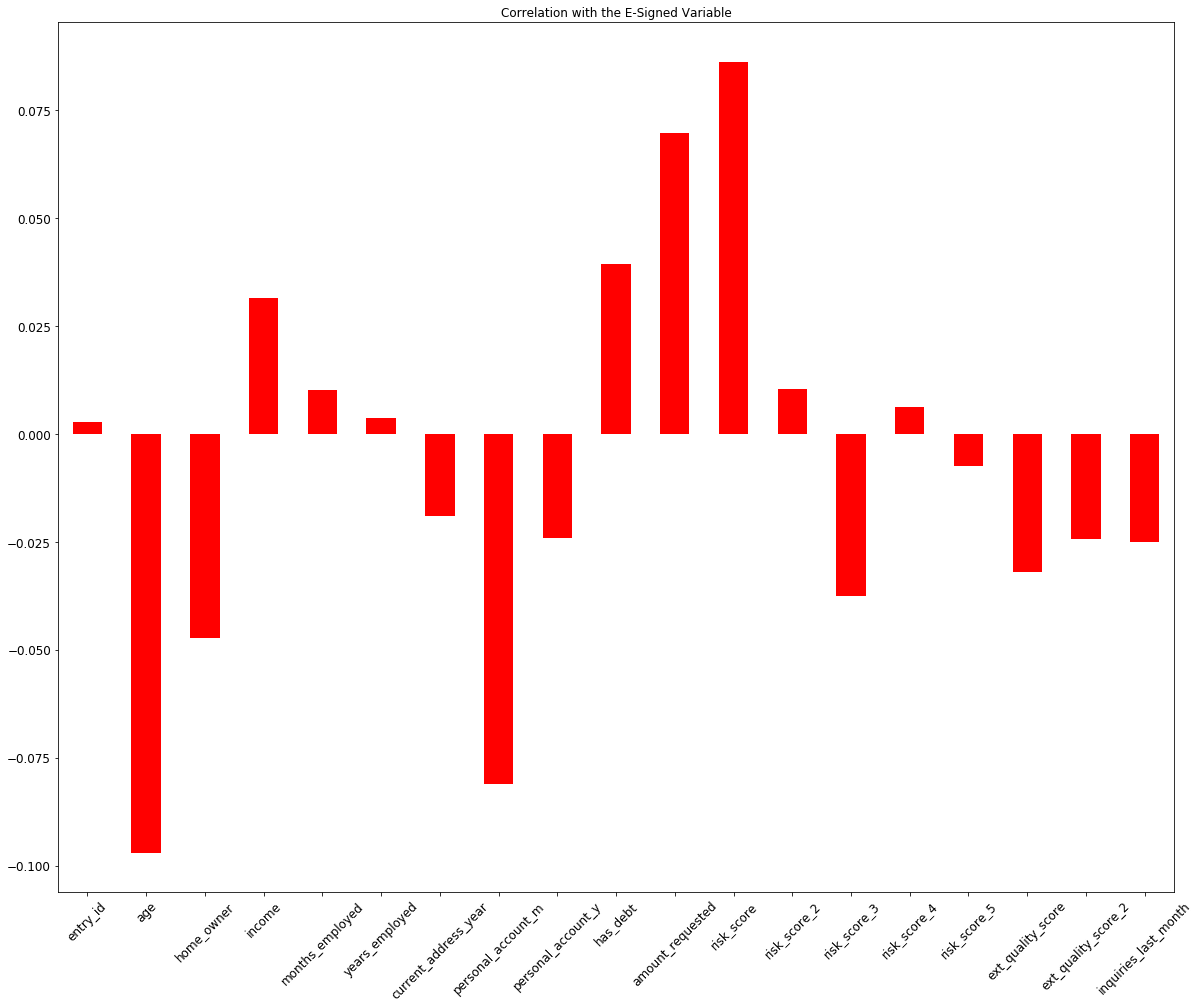

In [35]:
plt.figure(figsize=(20, 16))
df.drop(['e_signed'], axis=1).corrwith(df['e_signed']).plot.bar(
title='Correlation with the E-Signed Variable', fontsize=12, rot=45, color='red')

# Feature Engineering

In [36]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [40]:
df['personal_account_months'] = (df.personal_account_m + (df.personal_account_y*12))
df.drop(['personal_account_m', 'personal_account_y'], axis=1, inplace=True)

In [42]:
df['pay_schedule'].value_counts()

bi-weekly       10716
weekly           3696
semi-monthly     2004
monthly          1492
Name: pay_schedule, dtype: int64

In [43]:
df = pd.get_dummies(df, drop_first=True)

# Model Building

In [48]:
X = df.drop(['e_signed'], axis=1)
y = df['e_signed']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.40      0.46      1654
           1       0.58      0.71      0.64      1928

    accuracy                           0.56      3582
   macro avg       0.56      0.55      0.55      3582
weighted avg       0.56      0.56      0.55      3582

[[ 659  995]
 [ 564 1364]]


In [54]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Learning rate set to 0.032107
0:	learn: 0.6906973	total: 125ms	remaining: 2m 4s
1:	learn: 0.6885270	total: 160ms	remaining: 1m 20s
2:	learn: 0.6863797	total: 188ms	remaining: 1m 2s
3:	learn: 0.6842705	total: 212ms	remaining: 52.7s
4:	learn: 0.6820452	total: 239ms	remaining: 47.6s
5:	learn: 0.6799576	total: 265ms	remaining: 43.8s
6:	learn: 0.6782451	total: 291ms	remaining: 41.2s
7:	learn: 0.6766511	total: 315ms	remaining: 39.1s
8:	learn: 0.6745979	total: 367ms	remaining: 40.5s
9:	learn: 0.6730395	total: 397ms	remaining: 39.3s
10:	learn: 0.6719135	total: 424ms	remaining: 38.2s
11:	learn: 0.6702787	total: 451ms	remaining: 37.1s
12:	learn: 0.6691116	total: 477ms	remaining: 36.2s
13:	learn: 0.6680245	total: 508ms	remaining: 35.8s
14:	learn: 0.6668319	total: 567ms	remaining: 37.2s
15:	learn: 0.6656335	total: 613ms	remaining: 37.7s
16:	learn: 0.6645551	total: 650ms	remaining: 37.6s
17:	learn: 0.6636876	total: 678ms	remaining: 37s
18:	learn: 0.6625559	total: 728ms	remaining: 37.6s
19:	learn: 0

165:	learn: 0.6098250	total: 6.18s	remaining: 31.1s
166:	learn: 0.6095134	total: 6.21s	remaining: 31s
167:	learn: 0.6093550	total: 6.23s	remaining: 30.9s
168:	learn: 0.6090803	total: 6.26s	remaining: 30.8s
169:	learn: 0.6088041	total: 6.3s	remaining: 30.8s
170:	learn: 0.6086356	total: 6.34s	remaining: 30.7s
171:	learn: 0.6085277	total: 6.37s	remaining: 30.7s
172:	learn: 0.6082835	total: 6.39s	remaining: 30.6s
173:	learn: 0.6081080	total: 6.42s	remaining: 30.5s
174:	learn: 0.6079510	total: 6.45s	remaining: 30.4s
175:	learn: 0.6078230	total: 6.47s	remaining: 30.3s
176:	learn: 0.6077058	total: 6.5s	remaining: 30.2s
177:	learn: 0.6075662	total: 6.52s	remaining: 30.1s
178:	learn: 0.6073455	total: 6.56s	remaining: 30.1s
179:	learn: 0.6072355	total: 6.58s	remaining: 30s
180:	learn: 0.6070755	total: 6.62s	remaining: 29.9s
181:	learn: 0.6069300	total: 6.64s	remaining: 29.9s
182:	learn: 0.6067749	total: 6.67s	remaining: 29.8s
183:	learn: 0.6067015	total: 6.69s	remaining: 29.7s
184:	learn: 0.6063

325:	learn: 0.5830564	total: 11.7s	remaining: 24.2s
326:	learn: 0.5828902	total: 11.7s	remaining: 24.1s
327:	learn: 0.5827067	total: 11.8s	remaining: 24.1s
328:	learn: 0.5825400	total: 11.8s	remaining: 24s
329:	learn: 0.5823528	total: 11.8s	remaining: 24s
330:	learn: 0.5821678	total: 11.8s	remaining: 23.9s
331:	learn: 0.5819444	total: 11.9s	remaining: 23.9s
332:	learn: 0.5818366	total: 11.9s	remaining: 23.9s
333:	learn: 0.5817216	total: 11.9s	remaining: 23.8s
334:	learn: 0.5815979	total: 12s	remaining: 23.8s
335:	learn: 0.5813955	total: 12s	remaining: 23.7s
336:	learn: 0.5810938	total: 12s	remaining: 23.7s
337:	learn: 0.5808937	total: 12s	remaining: 23.6s
338:	learn: 0.5807655	total: 12.1s	remaining: 23.5s
339:	learn: 0.5805545	total: 12.1s	remaining: 23.5s
340:	learn: 0.5804001	total: 12.1s	remaining: 23.5s
341:	learn: 0.5802828	total: 12.2s	remaining: 23.4s
342:	learn: 0.5800355	total: 12.2s	remaining: 23.4s
343:	learn: 0.5797553	total: 12.2s	remaining: 23.3s
344:	learn: 0.5795745	to

490:	learn: 0.5542097	total: 17.3s	remaining: 18s
491:	learn: 0.5540276	total: 17.3s	remaining: 17.9s
492:	learn: 0.5538140	total: 17.4s	remaining: 17.9s
493:	learn: 0.5536766	total: 17.4s	remaining: 17.8s
494:	learn: 0.5534632	total: 17.4s	remaining: 17.8s
495:	learn: 0.5532627	total: 17.4s	remaining: 17.7s
496:	learn: 0.5530447	total: 17.5s	remaining: 17.7s
497:	learn: 0.5528983	total: 17.5s	remaining: 17.6s
498:	learn: 0.5527354	total: 17.5s	remaining: 17.6s
499:	learn: 0.5526163	total: 17.6s	remaining: 17.6s
500:	learn: 0.5524496	total: 17.6s	remaining: 17.5s
501:	learn: 0.5523341	total: 17.6s	remaining: 17.5s
502:	learn: 0.5521952	total: 17.6s	remaining: 17.4s
503:	learn: 0.5520437	total: 17.7s	remaining: 17.4s
504:	learn: 0.5519304	total: 17.7s	remaining: 17.3s
505:	learn: 0.5517930	total: 17.7s	remaining: 17.3s
506:	learn: 0.5516945	total: 17.7s	remaining: 17.2s
507:	learn: 0.5515569	total: 17.8s	remaining: 17.2s
508:	learn: 0.5513825	total: 17.8s	remaining: 17.2s
509:	learn: 0.

650:	learn: 0.5307283	total: 23.4s	remaining: 12.6s
651:	learn: 0.5305867	total: 23.5s	remaining: 12.5s
652:	learn: 0.5304703	total: 23.5s	remaining: 12.5s
653:	learn: 0.5303643	total: 23.6s	remaining: 12.5s
654:	learn: 0.5302294	total: 23.6s	remaining: 12.4s
655:	learn: 0.5300959	total: 23.6s	remaining: 12.4s
656:	learn: 0.5299361	total: 23.7s	remaining: 12.4s
657:	learn: 0.5297317	total: 23.7s	remaining: 12.3s
658:	learn: 0.5296066	total: 23.7s	remaining: 12.3s
659:	learn: 0.5294933	total: 23.8s	remaining: 12.2s
660:	learn: 0.5293704	total: 23.8s	remaining: 12.2s
661:	learn: 0.5292236	total: 23.8s	remaining: 12.2s
662:	learn: 0.5290523	total: 23.9s	remaining: 12.1s
663:	learn: 0.5289639	total: 23.9s	remaining: 12.1s
664:	learn: 0.5288155	total: 23.9s	remaining: 12.1s
665:	learn: 0.5286732	total: 24s	remaining: 12s
666:	learn: 0.5286017	total: 24s	remaining: 12s
667:	learn: 0.5284843	total: 24.1s	remaining: 12s
668:	learn: 0.5283827	total: 24.1s	remaining: 11.9s
669:	learn: 0.5282550	

811:	learn: 0.5091223	total: 29.3s	remaining: 6.78s
812:	learn: 0.5090079	total: 29.4s	remaining: 6.75s
813:	learn: 0.5088590	total: 29.4s	remaining: 6.71s
814:	learn: 0.5087150	total: 29.4s	remaining: 6.67s
815:	learn: 0.5085512	total: 29.4s	remaining: 6.64s
816:	learn: 0.5084581	total: 29.5s	remaining: 6.6s
817:	learn: 0.5083713	total: 29.5s	remaining: 6.56s
818:	learn: 0.5082509	total: 29.5s	remaining: 6.53s
819:	learn: 0.5081491	total: 29.6s	remaining: 6.49s
820:	learn: 0.5080416	total: 29.6s	remaining: 6.46s
821:	learn: 0.5078986	total: 29.6s	remaining: 6.42s
822:	learn: 0.5078109	total: 29.7s	remaining: 6.38s
823:	learn: 0.5076833	total: 29.7s	remaining: 6.34s
824:	learn: 0.5075290	total: 29.7s	remaining: 6.31s
825:	learn: 0.5074214	total: 29.8s	remaining: 6.27s
826:	learn: 0.5073099	total: 29.8s	remaining: 6.23s
827:	learn: 0.5071537	total: 29.8s	remaining: 6.2s
828:	learn: 0.5069987	total: 29.8s	remaining: 6.16s
829:	learn: 0.5068294	total: 29.9s	remaining: 6.12s
830:	learn: 0.

973:	learn: 0.4888142	total: 34.8s	remaining: 929ms
974:	learn: 0.4886722	total: 34.8s	remaining: 893ms
975:	learn: 0.4885412	total: 34.9s	remaining: 857ms
976:	learn: 0.4884615	total: 34.9s	remaining: 821ms
977:	learn: 0.4883210	total: 34.9s	remaining: 785ms
978:	learn: 0.4881436	total: 35s	remaining: 750ms
979:	learn: 0.4879785	total: 35s	remaining: 714ms
980:	learn: 0.4878334	total: 35s	remaining: 678ms
981:	learn: 0.4877161	total: 35.1s	remaining: 643ms
982:	learn: 0.4876361	total: 35.1s	remaining: 607ms
983:	learn: 0.4875651	total: 35.1s	remaining: 571ms
984:	learn: 0.4874608	total: 35.1s	remaining: 535ms
985:	learn: 0.4873759	total: 35.2s	remaining: 500ms
986:	learn: 0.4872963	total: 35.2s	remaining: 464ms
987:	learn: 0.4872663	total: 35.2s	remaining: 428ms
988:	learn: 0.4871649	total: 35.3s	remaining: 392ms
989:	learn: 0.4870526	total: 35.3s	remaining: 356ms
990:	learn: 0.4869449	total: 35.3s	remaining: 321ms
991:	learn: 0.4868151	total: 35.3s	remaining: 285ms
992:	learn: 0.4866

In [56]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=350, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier( estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.58 (+/- 0.00) [Logistic Regression]
Accuracy: 0.63 (+/- 0.01) [Random Forest]
Accuracy: 0.57 (+/- 0.01) [naive Bayes]
Accuracy: 0.59 (+/- 0.01) [Ensemble]


### Catboost performed better in this use case. With 64% Accuracy. 